In [1]:
using PyPlot, FileIO, AnomalyDetection, EvalCurves, Flux
import PyPlot: plot
include("./plots.jl")

┌ Info: Precompiling AnomalyDetection [2069a70b-aa58-5cc0-a11c-32e347b774c5]
└ @ Base loading.jl:1187
┌ Info: Precompiling FluxExtensions [76425322-8995-11e8-0106-93ec95767fb2]
└ @ Base loading.jl:1187


loaded


PyPlot.plot

In [2]:
# load data
dataset = load("toy_data_3.jld2")["data"]
X = AnomalyDetection.Float.(dataset.data)
Y = dataset.labels
nX = X[:, Y.==0]
M, N = size(X)

(2, 103)

In [3]:
# GAN settings
zdim = 1 # code dimension
xdim = M # dimension of data
hiddendim = 32  

# setup the GAN model object
gsize = [zdim; hiddendim; hiddendim; xdim] # generator layout
dsize = [xdim; hiddendim*2; hiddendim*2; 1] # discriminator layout
lambda = 0.5 # anomaly score parameter in [0, 1]
# 1 - ignores the discriminator score
# 0- ignores the reconstruction error score
threshold = 0 # classification threshold, is recomputed (getthreshold or when using fit!)
contamination = size(Y[Y.==1],1)/size(Y, 1) # contamination ratio
batchsize = 30 # batchsize
iterations = 15000 # no of iterations
cbit = 5000 # when should output be printed
nepochs = Int(ceil(batchsize*iterations/size(nX,2))) # if this is supplied, do epoch training
verbfit = true # if output should be produced
pz = randn # code distribution (rand should also work)
activation = Flux.leakyrelu # should work better than relu
layer = Flux.Dense
rdelta = 1e-5 # stop training after this reconstruction error is achieved
# this parameter is basically useless in the case of GANs
Beta = 1.0 # for automatic threshold computation, in [0, 1] 
# 1.0 = tight around normal samples
tracked = true # do you want to store training progress?
# it can be later retrieved from model.traindata
eta = 0.001
model = GANmodel(gsize, dsize; lambda=lambda, threshold=threshold, 
    contamination=contamination, batchsize=batchsize, iterations=iterations, 
    cbit=cbit, nepochs = nepochs, verbfit=verbfit, 
    pz = pz, activation = activation, rdelta = rdelta, Beta = Beta, 
    layer = layer, tracked = tracked, eta = eta)

GANmodel(GAN(Chain(Dense(1, 32, NNlib.leakyrelu), Dense(32, 32, NNlib.leakyrelu), Dense(32, 2)), Chain(Dense(1, 32, NNlib.leakyrelu), Dense(32, 32, NNlib.leakyrelu), Dense(32, 2)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu), Dense(64, 1, NNlib.σ)), Chain(Dense(2, 64, NNlib.leakyrelu), Dense(64, 64, NNlib.leakyrelu), Dense(64, 1, NNlib.σ)), randn), 0.5, 0, 0.1262135922330097, 30, 15000, 5000, 5000, true, 1.0f-5, 1.0f0, MVHistory{ValueHistories.History}, 0.001)

In [4]:
# fit the model
Z = AnomalyDetection.getcode(model, size(nX,2))
AnomalyDetection.evalloss(model, nX, Z)
AnomalyDetection.fit!(model, nX)
AnomalyDetection.evalloss(model, nX, Z)

discriminator loss: 0.6983965
generator loss: 0.6931987
reconstruction error: 0.40488276



Progress:   0%|                                         |  ETA: 1 days, 3:33:43
  discriminator loss:    0.692302
  generator loss:        0.69068825
Progress:   1%|█                                        |  ETA: 0:09:28
  discriminator loss:    0.71095914
  generator loss:        0.75314915
Progress:   2%|█                                        |  ETA: 0:05:19
  discriminator loss:    0.70719916
  generator loss:        0.7597877
Progress:   3%|█                                        |  ETA: 0:03:45
  discriminator loss:    0.73235154
  generator loss:        0.82193726
Progress:   4%|██                                       |  ETA: 0:02:58
  discriminator loss:    0.53722143
  generator loss:        0.83787686
Progress:   5%|██                                       |  ETA: 0:02:28
  discriminator loss:    0.60585165
  generator loss:        0.76132464
Progress:   7%|███                                      |  ETA: 0:02:07
  discriminator loss:    0.539712
  generator loss:        

Progress:  46%|███████████████████                      |  ETA: 0:00:25
  discriminator loss:    0.7142281
  generator loss:        0.70438737
Progress:  47%|███████████████████                      |  ETA: 0:00:25
  discriminator loss:    0.69664407
  generator loss:        0.66198945
Progress:  47%|███████████████████                      |  ETA: 0:00:25
  discriminator loss:    0.6925118
  generator loss:        0.70175976
Progress:  48%|████████████████████                     |  ETA: 0:00:24
  discriminator loss:    0.70191336
  generator loss:        0.67076117
Progress:  49%|████████████████████                     |  ETA: 0:00:24
  discriminator loss:    0.69257295
  generator loss:        0.695187
Progress:  50%|█████████████████████                    |  ETA: 0:00:23
  discriminator loss:    0.6954701
  generator loss:        0.6805183
Progress:  51%|█████████████████████                    |  ETA: 0:00:22
  discriminator loss:    0.6901413
  generator loss:        0.7072148


Progress:  91%|█████████████████████████████████████    |  ETA: 0:00:03
  discriminator loss:    0.6783283
  generator loss:        0.70447046
Progress:  92%|██████████████████████████████████████   |  ETA: 0:00:03
  discriminator loss:    0.6747539
  generator loss:        0.6975009
Progress:  94%|██████████████████████████████████████   |  ETA: 0:00:03
  discriminator loss:    0.67304873
  generator loss:        0.7038203
Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:02
  discriminator loss:    0.705801
  generator loss:        0.680884
Progress:  96%|███████████████████████████████████████  |  ETA: 0:00:02
  discriminator loss:    0.703583
  generator loss:        0.65342873
Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:01
  discriminator loss:    0.6966486
  generator loss:        0.68858796
Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:01
  discriminator loss:    0.7040696
  generator loss:        0.70941675
Prog

discriminator loss: 0.6787641
generator loss: 0.7364361
reconstruction error: 0.121352



Progress: 100%|█████████████████████████████████████████| Time: 0:00:38
  discriminator loss:    0.6840707
  generator loss:        0.7214951
  reconstruction error:  0.11282519


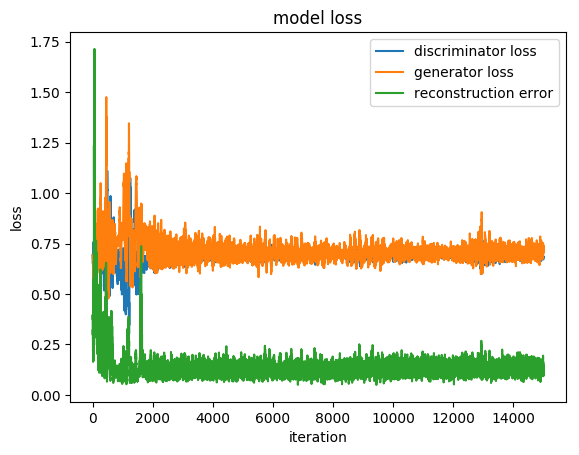

In [5]:
# plot model loss
plot(model)
show()

In [6]:
# generate new data
xgen = AnomalyDetection.generate(model, N)

2×103 Array{Float32,2}:
 0.84676   0.83677  0.0294288  0.836673  …  0.722566  0.554508  0.749941
 0.886429  0.8759   0.933414   0.875798     0.768456  0.603859  0.794877

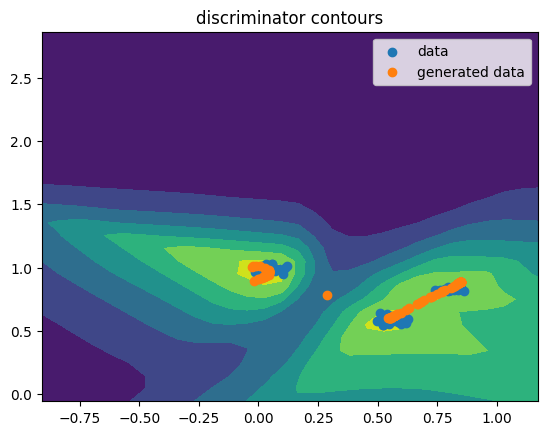

In [7]:
# plot them
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)


x = range(xl[1], stop=xl[2], length=30)
y = range(yl[1], stop=yl[2], length=30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.discriminate(model, AnomalyDetection.Float.([x[j], y[i]]))[1]
    end
end

figure()
contourf(x, y, zz)
scatter(nX[1,:], nX[2,:], label = "data")
scatter(xgen[1,:], xgen[2,:], label = "generated data")
title("discriminator contours")
xlim(xl)
ylim(yl)
legend()
show()

Classification is based on anomaly score computed as a weighted average of reconstruction error and discriminator score
\begin{equation}
A(x) = (1-\lambda)D(x)+\lambda||x-G(z)||_{2, z \sim p(z)}
\end{equation}

In [8]:
# predict labels
AnomalyDetection.setthreshold!(model, X)
global tryhat = AnomalyDetection.predict(model, X)

103-element Array{Int64,1}:
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 0

In [9]:
# get all the labels
tryhat, tstyhat, _, _ = AnomalyDetection.rocstats(dataset, dataset, model);


 Training data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 12
  tn = 89
  fp = 1
  fn = 1
precision: 0.9230769230769231
f1score: 0.9230769230769231
recall: 0.9230769230769231
false positive rate: 0.011111111111111112
equal error rate: 0.04401709401709402

 Testing data performance: 
MLBase.ROCNums{Int64}
  p = 13
  n = 90
  tp = 12
  tn = 90
  fp = 0
  fn = 1
precision: 1.0
f1score: 0.96
recall: 0.9230769230769231
false positive rate: 0.0
equal error rate: 0.038461538461538464


In [10]:
# anomaly score contour plot
# get limits of the figure
xl = (minimum(X[1,:])-0.05, maximum(X[1,:]) + 0.05)
yl = (minimum(X[2,:])-0.05, maximum(X[2,:]) + 0.05)

# compute the anomaly score on a grid
x = range(xl[1], stop=xl[2], length=30)
y = range(yl[1], stop=yl[2], length=30)
zz = zeros(size(y,1),size(x,1))
for i in 1:size(y, 1)
    for j in 1:size(x, 1)
        zz[i,j] = AnomalyDetection.anomalyscore(model, AnomalyDetection.Float.([x[j], y[i]]))
    end
end

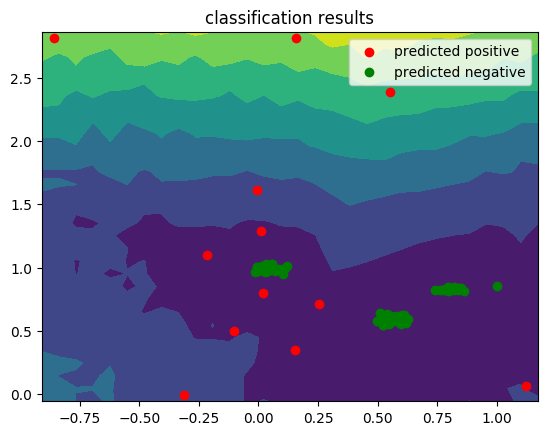

In [11]:
# plot it all
f = figure()
contourf(x, y, zz)
scatter(X[1, tryhat.==1], X[2, tryhat.==1], c = "r", 
    label = "predicted positive")
scatter(X[1, tryhat.==0], X[2, tryhat.==0], c = "g", 
    label = "predicted negative")
title("classification results")
xlim(xl)
ylim(yl)
legend()
show()

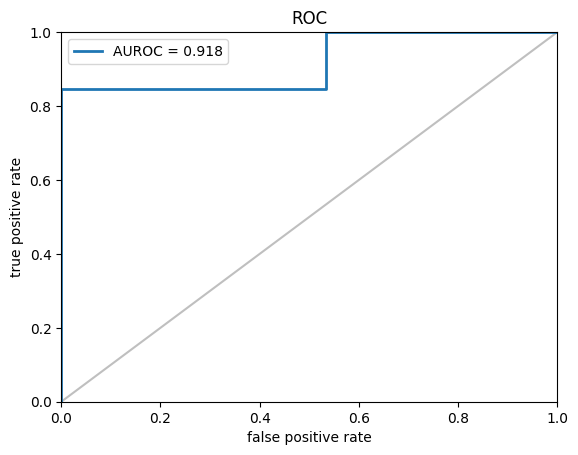

In [12]:
# plot ROC curve and compute AUROC score
ascore = AnomalyDetection.anomalyscore(model, X);
fprvec, tprvec = EvalCurves.roccurve(ascore, Y)
auroc = round(EvalCurves.auc(fprvec, tprvec),digits=3)
EvalCurves.plotroc((fprvec, tprvec, "AUROC = $(auroc)"))
show()

In [13]:
# plot EER for different settings of lambda
using MLBase: roc, correctrate, precision, recall, f1score, false_positive_rate, false_negative_rate
n = 21
lvec = range(0,stop=1,length=n)
eervec = zeros(n)
for i in 1:n
    model.lambda = lvec[i]
    AnomalyDetection.setthreshold!(model, X)
    global tryhat, tsthat, trroc, tstroc = AnomalyDetection.rocstats(dataset.data, dataset.labels,
        dataset.data, dataset.labels, model, verb = false)
    eervec[i] = (false_positive_rate(tstroc) + false_negative_rate(tstroc))/2
end

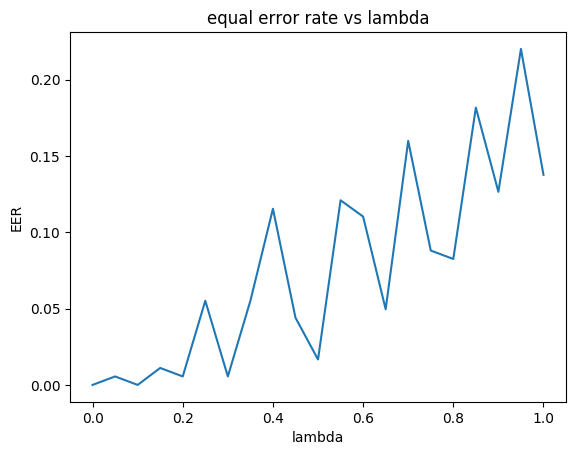

In [14]:
f = figure()
plot(lvec, eervec)
title("equal error rate vs lambda")
xlabel("lambda")
ylabel("EER")
show()